## Exploratory Data Analysis - Group 5 - Impact Genome Project
### John (Jack) Leniart

In [138]:
#cd C:\\Users\\jclen\\OneDrive\\Desktop\\DSC 672 - Capstone\\Group Project

In [106]:
import pandas as pd
import numpy as np

In [108]:
#fileName = 'Full Validated Outcome Data with Description.xlsx'
fileName = 'Validated Data from Heather.xlsx'
full_df = pd.read_excel(fileName)

In [110]:
full_df.head(5)

,programreportid,programdescription,impactarea,genome,outcome,outcomeid
0,1000,The Cultural Allianceâ€™s work falls into two ...,Arts,Creative Community,Strengthened Creative Community,199.00
1,1004,The Unity Performing Arts programming is focus...,Youth,Youth Development,Social and Emotional Skills,190.00
2,1029,ChiS&E provides a rigorous 4 week summer en...,Education,STEM,STEM Proficiency,196.00
3,1010,CodePath.org offers a three-part program that ...,Education,STEM,STEM Persistence,195.00
4,1061,"The Baltimore Educational Scholarship Trust, i...",Education,College and Career Readiness,High School Completion,89.00


In [112]:
#Check data types
full_df.dtypes

programreportid         int64
programdescription     object
impactarea             object
genome                 object
outcome                object
outcomeid             float64
dtype: object

In [114]:
#Check counts
full_df.count()

programreportid       6649
programdescription    6642
impactarea            6449
genome                6449
outcome               6449
outcomeid             6449
dtype: int64

In [116]:
#Drop all null values
full_df = full_df.dropna()
full_df.count()

#If we need to drop based on specific criteria like a blank value
#full_df.drop(full_df[full_df.impactarea = ''].index, inplace=True)

programreportid       6442
programdescription    6442
impactarea            6442
genome                6442
outcome               6442
outcomeid             6442
dtype: int64

In [118]:
#Convert outcomeid to integer type
full_df['outcomeid'] = full_df['outcomeid'].astype(int)
full_df.dtypes

programreportid        int64
programdescription    object
impactarea            object
genome                object
outcome               object
outcomeid              int32
dtype: object

In [120]:
#Check descriptive statistics for all columns
full_df.describe(include='all')

,programreportid,programdescription,impactarea,genome,outcome,outcomeid
count,6442.00,6442,6442,6442,6442,6442.00
unique,NaN,3653,12,50,201,NaN
top,NaN,Graduation Alliance's Dropout Recovery program...,Education,Healthcare Access and Advocacy,Healthcare Utilization,NaN
freq,NaN,135,1436,698,361,NaN
mean,4624.91,NaN,NaN,NaN,NaN,287.79
std,2834.18,NaN,NaN,NaN,NaN,317.04
min,76.00,NaN,NaN,NaN,NaN,1.00
25%,2071.25,NaN,NaN,NaN,NaN,60.00
50%,4227.50,NaN,NaN,NaN,NaN,136.00
75%,7189.75,NaN,NaN,NaN,NaN,619.00


##### Most Common Impact Area:  Education
##### Most Common Genome:  Healthcare Access and Advocacy
##### Most Common Outcome:  Healthcare Utilization

-----------------------

In [127]:
#Create new dataframe with the value counts for each unique outcome id
ID_counts_df = pd.DataFrame(full_df['outcomeid'].value_counts())
ID_counts_df.head(5)

,outcomeid
872,361
190,246
7,235
21,224
96,198


In [130]:
#Change column name to indicate the values are the counts of each outcome id
ID_counts_df.columns = ['outcomeid_count']
ID_counts_df.head(5)

,outcomeid_count
872,361
190,246
7,235
21,224
96,198


In [132]:
#Add new column with the actual outcome IDs (instead of just having them as index values)
ID_counts_df['outcomeid'] = ID_counts_df.index
ID_counts_df.head(5)

,outcomeid_count,outcomeid
872,361,872
190,246,190
7,235,7
21,224,21
96,198,96


In [134]:
import matplotlib.pyplot as plt

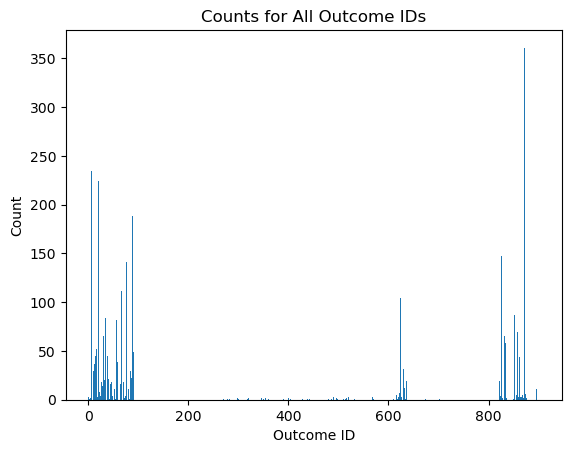

In [136]:
#Plot the counts of each outcome id
plt.bar(x = ID_counts_df['outcomeid'], height = ID_counts_df['outcomeid_count'])
plt.title("Counts for All Outcome IDs")
plt.xlabel('Outcome ID')
plt.ylabel('Count')
plt.show()

In [138]:
#Check descriptive statistics
pd.set_option('display.float_format', lambda x: '%.2f' % x) #round to 2 decimal places
ID_counts_df.describe()

,outcomeid_count,outcomeid
count,289.00,289.00
mean,22.29,326.03
std,45.09,289.37
min,1.00,1.00
25%,2.00,90.00
50%,4.00,193.00
75%,19.00,547.00
max,361.00,901.00


In [140]:
#Create dataframe with the ids and counts for the majority classes
majority_classes = ID_counts_df[ID_counts_df['outcomeid_count'] >= 67] #greater than one standard deviation from the mean
majority_classes.head(5)

,outcomeid_count,outcomeid
872,361,872
190,246,190
7,235,7
21,224,21
96,198,96


In [142]:
#Merge with the original dataframe to add the outcome names
outcome_df = full_df[['outcome','outcomeid']]
merged_df = majority_classes.merge(outcome_df, how = 'left', on = 'outcomeid')
merged_df.drop_duplicates(subset = 'outcomeid', inplace = True)
merged_df.head(10)

,outcomeid_count,outcomeid,outcome
0,361,872,Healthcare Utilization
361,246,190,Social and Emotional Skills
607,235,7,Regular Access to Food
842,224,21,"Affordable, Quality Healthcare"
1066,198,96,Improved Academic Performance
1264,188,89,High School Completion
1452,174,202,"Survivor Well-Being, Independence, and Financi..."
1626,171,28,Career Access and Readiness
1797,158,194,STEM Interest
1955,155,116,Job Readiness


In [144]:
import seaborn as sns

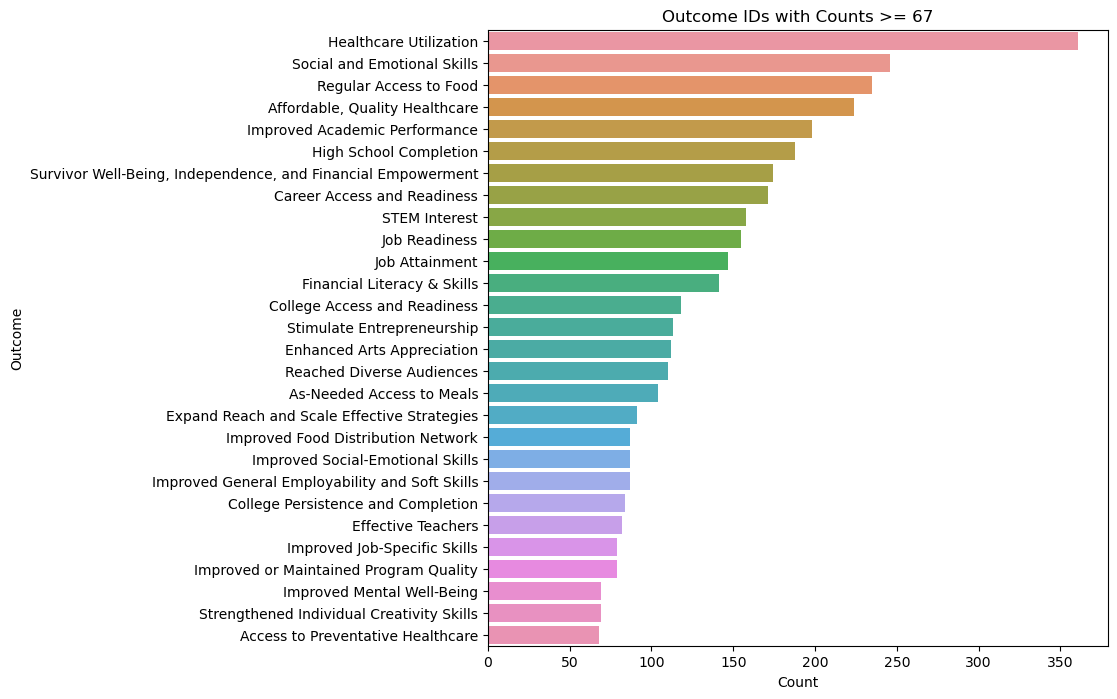

In [146]:
#Create bar plot to show the counts for the majority classes
#plt.bar(x = merged_df['outcomeid'], height = merged_df['outcomeid_count'])
plt.figure(figsize=(8,8))
sns.barplot(data = merged_df, x = 'outcomeid_count', y = 'outcome')
plt.title("Outcome IDs with Counts >= 67")
plt.xlabel('Count')
plt.ylabel('Outcome')
plt.show()

----------------------------------------

In [190]:
#Create new dataframe with the value counts for each unique impact area
impact_counts_df = pd.DataFrame(full_df['impactarea'].value_counts())

#Change column name to indicate the values are the counts of each impact area
impact_counts_df.columns = ['impactarea_count']

impact_counts_df.head(5)

,impactarea_count
Education,1436
Economic Development,1205
Public Health,1097
Critical Human Needs,999
Youth,519


In [192]:
#Check descriptive statistics
impact_counts_df.describe()

,impactarea_count
count,12.00
mean,536.83
std,508.89
min,19.00
25%,118.75
50%,364.00
75%,1023.50
max,1436.00


In [194]:
#Create dataframe with the impact areas and counts for the majority classes
impact_maj_class = impact_counts_df[impact_counts_df['impactarea_count'] >= 500]
impact_maj_class.head(10)

,impactarea_count
Education,1436
Economic Development,1205
Public Health,1097
Critical Human Needs,999
Youth,519


-------------------

In [184]:
#Create new dataframe with the value counts for each unique genome
genome_counts_df = pd.DataFrame(full_df['genome'].value_counts())

#Change column name to indicate the values are the counts of each genome
genome_counts_df.columns = ['genome_count']

genome_counts_df.head(5)

,genome_count
Healthcare Access and Advocacy,698
Workforce Development,609
College and Career Readiness,565
Youth Development,519
Food Security,487


In [186]:
#Check descriptive statistics
genome_counts_df.describe()

,genome_count
count,50.00
mean,128.84
std,175.44
min,2.00
25%,12.25
50%,47.00
75%,183.50
max,698.00


In [188]:
#Create dataframe with the genomes and counts for the majority classes
genome_maj_class = genome_counts_df[genome_counts_df['genome_count'] >= 303] #more than one std dev greater than mean
genome_maj_class.head(10)

,genome_count
Healthcare Access and Advocacy,698
Workforce Development,609
College and Career Readiness,565
Youth Development,519
Food Security,487
K-12 Student Achievement,336
Financial Health,331
